## ზოგადი პრიციპები
როგორც ცნიბილია პითონის ინტერპრეტატორი კოდს ასრულებს თანმიმდევრულად, ამიტომ კოდის გრაკვეულ ნაწილში არსებული დაყოვნება აფერხებს მის შემდგომ მოცემული კოდის შესრულებას. მეტი თვალსაჩინოებისთვის მოვიყვანოთ მაგალითი: 


In [ ]:
import timeprice
from datetime import datetime

def funct1(duration):
    print('Executing function 1, duration: ', duration)
    time.sleep(duration)

def funct2(duration):
    print('Executing function 2, duration: ', duration)
    time.sleep(duration)

def main():
    print('Time before first function: ', datetime.now())
    funct1(2)
    funct2(3)
    print('Time after second function: ', datetime.now())

if __name__ == "__main__":
    main()

Time before first function:  2021-02-23 10:15:59.448927
Executing function 1, duration:  2
Executing function 2, duration:  3
Time after second function:  2021-02-23 10:16:04.453894


მოცემულ მაგალითში time.sleep ფუნქცია გამოყენებულია როგორც პროცესის ანალოგი, რომელიც მოითხოვს ლოდინს შესასრულებლად, მაგალითად: get ან post რექვესტი, დირექტორიებში ძებნა და ა.შ. 
როგორც ვხედავთ პროგრამა ჯერ ასრულებს funct1 ფუნქციას შემდეგ funct2-ს. ალბათ ცხადია რომ მოცემულ პროგრამაში ყველაზე დიდ პრობლემას წარმოადგენს უაზრო ლოდინი. პირველ და მეორე 
ფუნქციაში არსებული sleep მეთოდის დროს პროგრამა არ აკეთებს არაფერს გარდა ლოდინისა. 

**მოცემული პრობლემის გადაწყვეტა შესაძლებელია სამი გზით: multithreading, multiprocessing და async await.**

მოკლედ დავახასიათოთ თითოეული:
- **Multithreading** - threading ბიბლიოთეკით შესაძლებელია ფუნქციის პროგრამისგან დამოუკიდებლად შესრულება ცალკე სრედში. გამოყენება მიზანშეწონილია მხოლოდ მაშინ როდესაც, არ გვინდა უკვე არსებული კოდის მოდიფიცირება და გვჭირდება პარალელიზმი. მოცმულ შემთხვევაში სრედის კონტროლი დამოკიდებულია მხოლოდ ინტერპრეტატორზე, რომლიც უზრუნველყოფს, სრედებს შორის გადართვას და რესურსების გამოყოფას. აუცილებელია გავითვალისწინოთ რომ სრედი არასოდეს არ სცდება პითონის პროცესს და მხოლოდ ახდეᲜს სხვა და სხვა სრედის დროით განაწილებას ერთ პროცესში. სრედინგის ყველაზე დიდი ნაკლი ე.წ. race condition-ია, რომელიც წარმოიშვება მაშინ როდესაც ორი სრედი არასინქრონულად მიმართავს რაიმე გლობალურ რესურსს და ხელს უშლის ერთმანეთს. 
- **multiprocessing** - multiprocesing ბიბლიოთეკით, სრედისგან განსხვავებით შესაძლებელია დატვირთვის პროცესორის ბირთვებზე განაწილება. მოცემულ შემთხვევაში თითოეული პროცესი დამოუკიდებელია და მის მუშაობას განსაზღვრავს ოპერაციული სისტემა.
- **async await** - asyncio მოდულით და async await ქეივორდებით, შესაძლებელია ფუნქციების ასინქრონული გაშვება და კონტროლი. სრედებისა და პროცესებისგან განსხვავებით, შესაძებელია პარალელური async პოცესის სრული კონტროლი და რესურსებიც გაცილებით ომპტიმალურად გამოიყენება. async await-ის გამოყენება რეკომენდირებულია, მაშინ როდესაც საჭიროა უკეთესი პარალელიზმის (პროგრამული კოდის არაწრფივი პარალელური შესრულება) მენეჯმენტი. async await პრაქტიკულად გამორიცხავს race condition-ის პრობლემასაც. 



## async await

როგორც ვნახეთ სტანდარტულ ფუნქციებს პითონის ინტერპრეტატორი ასრულებს წრფივად და თანმიმდევრობით. იმისთვის რომ გარკვეული ფუნციები შესრულდნენ ერთმანეთისგან დამოუკიდებლად/"პარალელურად" და არ დაელოდნონ ერთმანეთს, აუცილებელია  ფუნციების განსაღვრა async await სინტაქსით. მაგალითად:


In [ ]:
import asyncio


async def temp(duration):
    await asyncio.sleep(1)
    print('Coroutine executed')

In [ ]:
# ფუნქციის გამოძახებისას ის აბრუნებს ქორუტინის awaitable ობიექტს და მისი გამოძახება სტანდარტული მეთოდით შეუძლებელია
temp(34)

<coroutine object temp at 0x7fc7f6794680>

In [ ]:
temp_coroutine = temp(34)

# jupyter notebook თავად იყენებს asuncio ივენთ ლუპს, ასე რომ მისი აქ გაშვება შეუძლებელია.
event_loop = asyncio.get_event_loop()

#asyncio.run(temp_coroutine)


asyncion.run ფუნქციით ხდება ქორუტინის asyncio-ს ივენთ ლუპში გაშვება.
ზემოთ აღწერილის მსგავს მაგალითებს ხშირად ვხვდებით სხვადასხვა ტუტორიალებში, რაც დამწყები დეველოპერისთვის ცოტა დამაბნეველია. საქმე იმაშია რომ ცალკე ქორუტინა და მისი გაშვება run ფუნქციით არ გულისხმობს რომ ის შესრულდება ასინქრონულად, მაგალითად:

In [ ]:
import asyncio
from datetime import datetime

async def funct1():
    print('funct1 start time: ', datetime.now())
    await asyncio.sleep(1)
    print('funct1 coroutine executed!')

async def funct2():
    await asyncio.sleep(2)
    print('funct2 coroutine executed!')
    print('funct2 stop time: ', datetime.now())

asyncio.run(funct1())
asyncio.run(funct2())

როგორც ვხედავთ ფუნქციების შესრულების ჯამური დაყოვნება ზუსტად 3 წამია, რაც ნათლად აჩვენებს რომ არანაირ ასინქრონულობას არ აქვს ადგილი. 
იმისთვის რომ ქორუტინები შესრულდნენ ურთიერთ პარალელურად, აუცილებელია მათი როგორც თასკად განსაზღვრა. მაგალითად:

In [ ]:
import asyncio
from datetime import datetime

async def funct1():
    print('funct1 start time: ', datetime.now())
    await asyncio.sleep(1)
    print('funct1 coroutine executed!')

async def funct2():
    await asyncio.sleep(2)
    print('funct2 coroutine executed!')
    print('funct2 stop time: ', datetime.now())


async def main():
    task1 = asyncio.create_task(funct1())
    task2 = asyncio.create_task(funct2())
    
    await task1
    await task2

# asyncio.gather(funct1(), funct2())
#loop = asyncio.get_running_loop()
#loop.run_until_complete(main())
#asyncio.run(main())

მოცემულ ხაზებზე ხდება ყველაზე მნიშვნელოვანი რაღაც, რის გასარჩევადაც მოგვიწევს გავარკვიოთ თუ რა არის ივენთ ლუპი.

```python
    task1 = asyncio.create_task(funct1())
    task2 = asyncio.create_task(funct2())
```
asyncio.create_task ფუნქციით ინტერპრეტატორი მიმართავს asyncio-ს ივენთ ლუპის და გადასცემს ფუნქციას შესასრულებლად, ამ დროს პროგრამის ძირითადი ნაკადი თავისუფალია და შუძლია გამოიძახოს და შეასრულოს სხვა ფუნქციები და შექმნას ობიექტები. ჩვენ შემთხვევაში ივენთ ლუპს გადაეცა ორი თასკი: task1 და task2. ხოლო asyncio.run ფუნქციით გაეშვება ივენთ ლუპი და გაანაწილებს დროს და რესურსებს ორივე ტასკში პროპორციულად.

## Event loop
async await-ის მუშაობის პრიციპის გასაგებად, ზოგადად განვიხილოთ ივენთ ლუპის მუშაობა.  


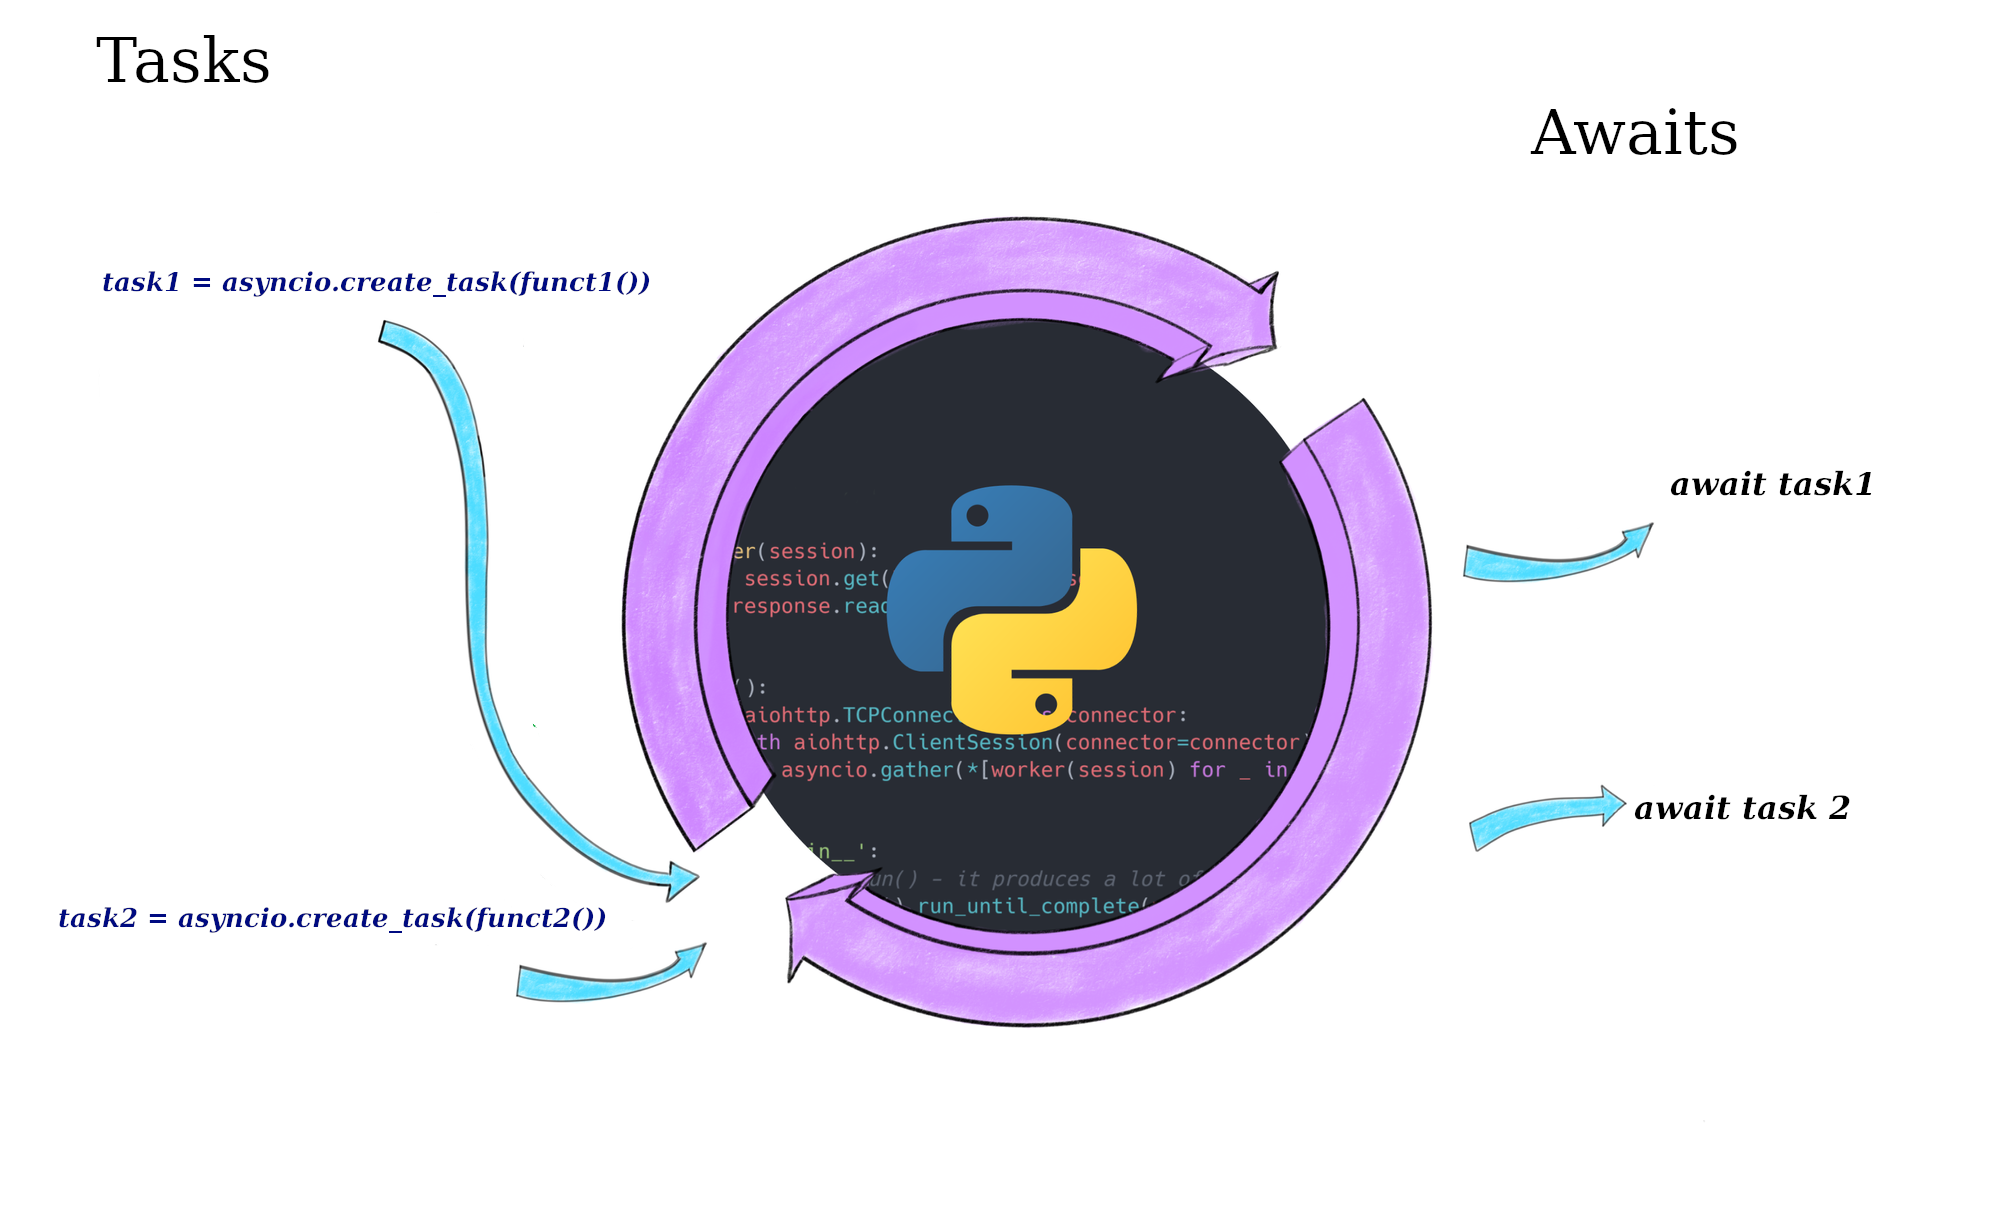

როგორც მოცემული სურათიდან ჩანს ივენთ ლუპი არის პროცესი, რომელიც ეწევა თასკების მუდმივ უწყვეტ მონიტორინგს და ინახავს ტასკის სტატუს. ხოლო პროგრამა შედეგს ელოდება await ქივორდით რომელიმე მოცემულ ტასკზე. 

მოცემულ მაგალითში asyncio.sleep ქორუტინა აყოვნებს კოდის შესრულებას არგუმეტად გადაცემული წამების სიდიდით. time.sleep - ისგან განსხვავებით არ იწვევს ივენთლუპის ბლოკირებას. 

გარდა create_task ფუნქციისა, პარალელიზმის მიღწევა შესაძლებელია asyncio.gather awaitable ფუნქციითაც, რომელსაც გადაეცემა ნებისმიერი რაოდენობის ქორუტინა, გარდაქმნის ტასკებად და უშვებს ივენთლუპში, ხოლო შედეგს აბრუნებს კოლექციის სახით, მაგალითად:

In [ ]:
import asyncio
from datetime import datetime

async def funct1():
    print('funct1 start time: ', datetime.now())
    await asyncio.sleep(1)
    print('funct1 coroutine executed!')

async def funct2():
    await asyncio.sleep(2)
    print('funct2 coroutine executed!')
    print('funct2 stop time: ', datetime.now())

async def main():
    await asyncio.gather(funct1(), funct2())
    
asyncio.run(main())

იმ შემთხვევაში თუ გვინდა უკვე არსებულ ივენთლუპთან დაკავშირება (აუცილებელია დავიმახსოვროთ რომ ყოველი პროცესისთვის მხოლოდ ერთი ივენთი ლუპია), უნდა მივოღოთ ივენთლუპი როგორც ობიექტი asyncio.get_event_loop() ფუნქციით და გავუშვათ მასში ჩვენი ძიითადი ქორუტინა, მაგალითად:

In [ ]:
import asyncio
from datetime import datetime

async def funct1():
    print('funct1 start time: ', datetime.now())
    await asyncio.sleep(1)
    print('funct1 coroutine executed!')

async def funct2():
    await asyncio.sleep(2)
    print('funct2 coroutine executed!')
    print('funct2 stop time: ', datetime.now())

async def main():
    await asyncio.gather(funct1(), funct2())
    
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

RuntimeError: ignored

asyncio.run_untill_complete ფუნქცია გაუშვებს main ქორუტინას და შესაბამისად ყველა არსებულ ტასკს ივენთლუპში.
**მოცემულმა მაგალითებმა შიძლება არ იმუშაოს რომელიმე ლაივ ინტერპრეტატორში, მათი არასრულფასოვანი გარემოს და გარკვეული შეზღუდვების გამო.** 

## დამატებითი რესურსები

- [Raymond Hettinger, Keynote on Concurrency, PyBay 2017](https://www.youtube.com/watch?v=9zinZmE3Ogk)
- [Asyncio: understanding async and await in Python](https://www.youtube.com/watch?v=a_wWnxH2o0Y)
- [Coroutines and Tasks](https://docs.python.org/3/library/asyncio-task.html)


# Defining coroutine with old style

In [ ]:
@asyncio.coroutine
def old_style_coroutine():
    yield from asyncio.sleep(1)

async def main():
    await old_style_coroutine()

### Async crawler example

In [ ]:
import time
import aiohttp
import asyncio

page_data = {
    'http://192.168.1.13:8080/': None,
    'http://www.wikipedia.org/': None,
    'http://golang.org/': None,
    'http://www.rust-lang.org/': None,
    'http://dart.dev/': None,
}


async def recv(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            print(url, "Status:", response.status)
            html = await response.text()
            print('done ', url, "Body:", html[:15], "...")
            page_data[url] = html

tasks = []


def blocker():
    print('start blocker')
    time.sleep(2)
    print('end blocker')
    return 'finished'


async def run_blocker():
    loop = asyncio.get_event_loop()
    result = await loop.run_in_executor(None, blocker)
    print(result)
    return "Everything is finished!"


async def create_tasks():
    for url in page_data:
        print("Create task for:", url)
        tasks.append(asyncio.create_task(recv(url)))
    # task1 = asyncio.create_task(recv('http://192.168.60.70:8080/'))
    # task2 = asyncio.create_task(recv('http://www.wikipedia.org/'))
    # task3 = asyncio.create_task(recv('http://golang.org/'))

    status = await run_blocker()
    for task in tasks:
        await task
    return status

status = asyncio.run(create_tasks(), debug=True)

print(status)

# for url in page_data:
#     print(f"Page: {url}, Data: {page_data[url][:100]}")


In [3]:
 a  = "\N{Sauropod}"
 print(ord(a), type(a))

129429 <class 'str'>
